In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
class LinearRegression:
    '''
    A class which implements linear regression model with gradient descent.
    '''
    def __init__(self, learning_rate=0.1, n_iterations=10000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights, self.bias = None, None
        self.loss = []
        self.lasso_ridge_loss = []
       
        
    @staticmethod
    def _mean_squared_error(y, y_hat):
      
        error = 0
        for i in range(len(y)):
            error += (y[i] - y_hat[i]) ** 2
        return error / len(y)
    
    def fit(self, X, y):
        
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        
        # Perform gradient descent
        for i in range(self.n_iterations):
            y_hat = np.dot(X, self.weights) + self.bias
            loss = self._mean_squared_error(y, y_hat)
            self.loss.append(loss)
            
            # Calculate derivatives
            partial_w = (1 / X.shape[0]) * (2 * np.dot(X.T, (y_hat - y)))
            partial_d = (1 / X.shape[0]) * (2 * np.sum(y_hat - y))
            
            # Update the coefficients
            self.weights -= self.learning_rate * partial_w
            self.bias -= self.learning_rate * partial_d
            
    
    def rl(self, y, y_hat, lamda): # ridge cost func

        error = 0
        for i in range(len(y)):
            error += (y[i] - y_hat[i]) ** 2
        error += lamda * (sum(self.weights**2))
        return error / len(y)
    
    def ls(self, y, y_hat, lamda):

        error = 0
        for i in range(len(y)):
            error += (y[i] - y_hat[i]) ** 2
        error += lamda * (sum(abs(self.weights)))
        return error / len(y)
        
    def fit_ridge_lasso(self, X, y, lamda, option):

        # Initialize weights and bias to zeros
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        
        # Perform gradient descent
        for i in range(self.n_iterations):
            # Line equation
            y_hat = np.dot(X, self.weights) + self.bias

            if option == 'ridge':
                loss = self.rl(y, y_hat,lamda)
            else:
                loss = self.ls(y, y_hat,lamda)
            
            self.lasso_ridge_loss.append(loss)
            
            # Calculate derivatives
            partial_w = (1 / X.shape[0]) * (2 * np.dot(X.T, (y_hat - y)))
            partial_d = (1 / X.shape[0]) * (2 * np.sum(y_hat - y))
            
            # Update the coefficients
            self.weights -= self.learning_rate * partial_w
            self.bias -= self.learning_rate * partial_d
        
        
    def predict(self, X):
        
        return np.dot(X, self.weights) + self.bias

In [41]:
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)

data = load_diabetes(as_frame=True)
df=pd.DataFrame(data.data)
# data = load_diabetes()

X = df[['age', 'sex','bp','s4','s5','s6']].values
y = df[['bmi']].values.reshape(-1,)

# data.target.shape
df.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [42]:
df.corr()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000


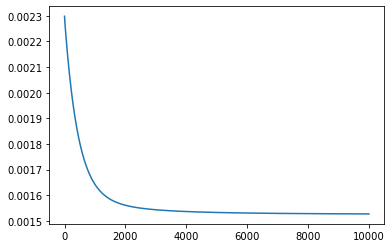

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)

from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

plt.plot(model.loss)
# loss plot in linear regression

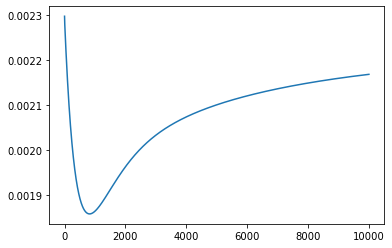

In [44]:
model = LinearRegression()
model.fit_ridge_lasso(X_train, y_train,1,'ridge')
plt.plot(model.lasso_ridge_loss) # Loss plot with ridge regression 


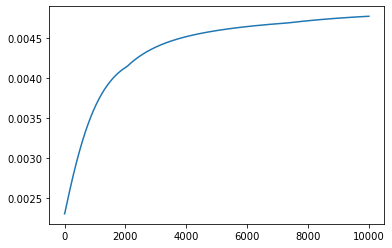

In [45]:
model = LinearRegression()
model.fit_ridge_lasso(X_train, y_train,1,'lasso')
plt.plot(model.lasso_ridge_loss) # Loss plot with ridge regression 
